In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from scipy import integrate
from scipy.integrate import odeint

In [2]:
G = 6.67 * 10**-11
m_t = 5.9736 * 10**24
r_t = 6.3781 * 10**6
m_l = 0.07349 * 10 **24
r_l = 1.7374
d = 3.844 * 10 ** 8
w = 2.6617 * 10**-6

In [3]:
r_t = r_t / d
r_l = r_l / d
phi = np.pi/8
theta = np.pi/8
v0 = (11.2 * 10**3) / d
p0_r = v0*np.cos(theta-phi)
p0_phi = r_t*v0*np.sin(theta-phi)


t = np.arange(0, 1e6, 1e3)
r0 = np.array([r_t,phi,p0_r,p0_phi])

In [4]:
def System(r0, t, G, m_t, m_l, d, omega):
    
    r, phi, p_r,p_phi = r0
    
    triangulo = (G*m_t)/d**3
    u = m_l/m_t
    r_prima = ( 1 + r**2 - 2*r*np.cos(phi - omega * t) )
    
    drdt = p_r
    dphidt = p_phi/r**2
    dp_rdt = (p_phi**2 /  r**3) - triangulo*( r**-2 + (r-np.cos(phi-omega*t))*u*r_prima**-3)
    dp_phidt = -triangulo*u*r*np.sin(phi-omega*t)*r_prima**-3
    
    return np.array([drdt,dphidt,dp_rdt,dp_phidt])

In [5]:
sol = odeint(System, r0, t, args = (G, m_t, m_l, d, w) )

C:\Users\TUF GAMING\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


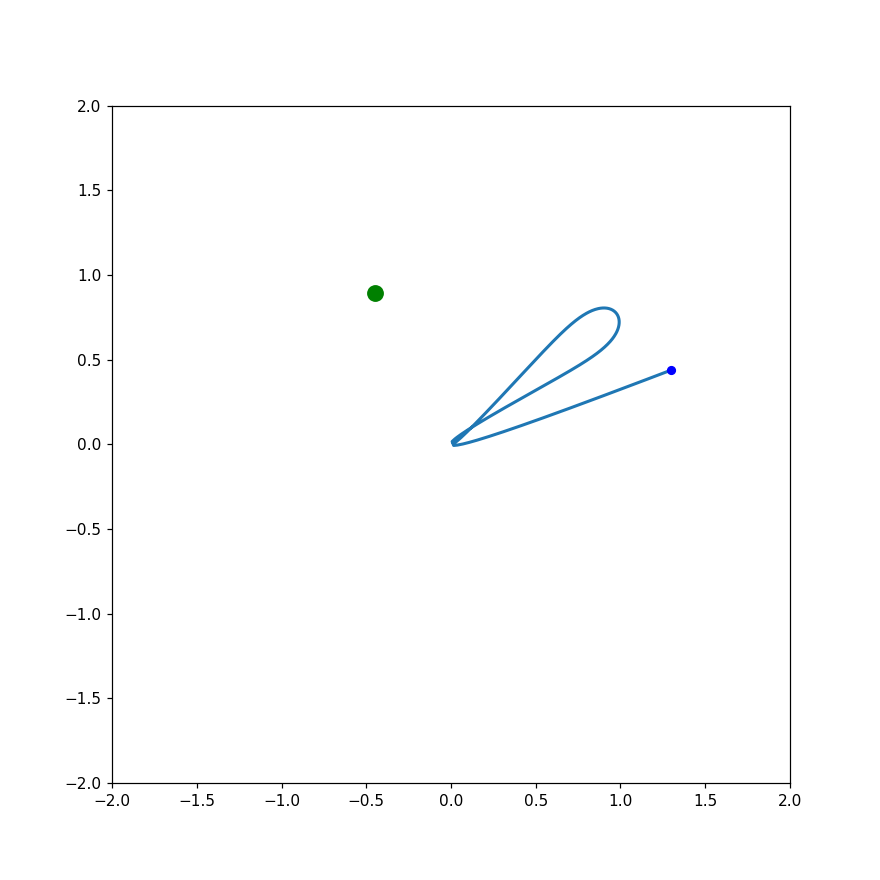

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.integrate import odeint

# Constantes
G = 6.67 * 10**-11
m_t = 5.9736 * 10**24
r_t = 6.3781 * 10**6
m_l = 0.07349 * 10 **24
r_l = 1.7374
d = 3.844 * 10 ** 8
w = 2.6617 * 10**-6
phi = np.pi/11
theta = np.pi/5.37


# Normalización de las constantes
r_t /= d
r_l /= d
v0 = (11.2 * 10**3) / d
p0_r = v0 * np.cos(-phi+theta)
p0_phi = r_t * v0 * np.sin(-phi+theta)

# Parámetros de la animación
num_frames = 1000
t_max = 1e6
t = np.linspace(0, t_max, num_frames)

# Condiciones iniciales
r0 = np.array([r_t, phi, p0_r, p0_phi])

# Función del sistema de ecuaciones diferenciales
def System(r0, t, G, m_t, m_l, d, omega):
    r, phi, p_r, p_phi = r0
    triangulo = (G * m_t) / d**3
    u = m_l / m_t
    r_prima = (1 + r**2 - 2 * r * np.cos(phi - omega * t))
    drdt = p_r
    dphidt = p_phi / r**2
    dp_rdt = (p_phi**2 / r**3) - triangulo * (r**-2 + (r - np.cos(phi - omega * t)) * u * r_prima**-3)
    dp_phidt = -triangulo * u * r * np.sin(phi - omega * t) * r_prima**-3
    return np.array([drdt, dphidt, dp_rdt, dp_phidt])

# Solución del sistema de ecuaciones diferenciales
sol = odeint(System, r0, t, args=(G, m_t, m_l, d, w))

# Posición de la Luna en cada fotograma
x_luna = np.cos(w * t)
y_luna = np.sin(w * t)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2., 2.)
ax.set_ylim(-2., 2.)
ax.set_aspect('equal', 'box')

# Inicialización de la línea y el punto
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'bo')
luna, = ax.plot([], [], 'go')  # Añadir una representación para la Luna

# Función de inicialización de la animación
def init():
    line.set_data([], [])
    point.set_data([], [])
    luna.set_data([], [])  # Inicializar la posición de la Luna
    return line, point, luna

# Función de actualización de la animación
def animate(i):
    x = sol[:i, 0] * np.cos(sol[:i, 1])  # Coordenadas x de la nave
    y = sol[:i, 0] * np.sin(sol[:i, 1])  # Coordenadas y de la nave
    line.set_data(x, y)  # Actualizar la trayectoria
    point.set_data(x[-1], y[-1])  # Actualizar la posición actual de la nave
    
    # Actualizar la posición de la Luna con tamaño especificado
    luna.set_data(x_luna[i], y_luna[i])
    luna.set_markersize(10)  # Tamaño de la Luna
    
    point.set_markersize(5)  # Tamaño de la nave
    
    return line, point, luna

# Crear la animación
ani = anim.FuncAnimation(fig, animate, frames=num_frames, init_func=init, blit=True)

# Mostrar la animación
plt.show()